In [10]:
#importing needed packages to parse json, read xml file
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [11]:
#creating a filepath for a test json
f = open('/Users/awburns2/Documents/Github/data-scientist-exercise02/data/NarrativeData_28999.json')

In [12]:
#loading the json file into an object
data = json.load(f)

In [107]:
#printing the file to understand the general structure
#each section contains EventId, narrative, and probable_cause
#for i in data['data']:
#    print(i)

In [14]:
#checking the length of the file to confirm the notation for each json file
#most json files contain 500 report entries
#len(data['data'])

500

In [16]:
#This begins the code to read the xml file
#creating basic objects for parsing
tree = ET.parse('/Users/awburns2/Documents/Github/data-scientist-exercise02/data/AviationData.xml')
root = tree.getroot()

In [17]:
#checking the root tag
root.tag

'{http://www.ntsb.gov}DATA'

In [18]:
#checking if root has any attributes
root.attrib

{}

In [19]:
#checking child notation
for child in root:
    print(child.tag, child.attrib)

{http://www.ntsb.gov}ROWS {}


In [108]:
#finding the element tags and structure of the xml file
#root is DATA, followed by ROWS and then ROW
#most of the information is stored within ROW
#[elem.tag for elem in root.iter()]


In [109]:
#confirmed event information is stored within ROW
#observing structure and noticing important information is element wise
#for row in root.iter('{http://www.ntsb.gov}ROW'):
#    print(row.attrib)

In [156]:
#confirming methodology that information can be found using @ methodology for future analysis
for accident in root.findall("./{http://www.ntsb.gov}ROWS/{http://www.ntsb.gov}ROW[@EventId='20070804X01107']"):
    print(accident.attrib)

{'EventId': '20070804X01107', 'InvestigationType': 'Accident', 'AccidentNumber': 'LAX07TA227', 'EventDate': '07/23/2007', 'Location': 'Happy Camp, CA', 'Country': 'United States', 'Latitude': '41.640555', 'Longitude': '-123.276945', 'AirportCode': '', 'AirportName': '', 'InjurySeverity': 'Fatal(1)', 'AircraftDamage': 'Destroyed', 'AircraftCategory': '', 'RegistrationNumber': 'N205BR', 'Make': 'Bell', 'Model': '205 A1++', 'AmateurBuilt': 'No', 'NumberOfEngines': '2', 'EngineType': 'Turbo Shaft', 'FARDescription': '', 'Schedule': '', 'PurposeOfFlight': 'Public Aircraft - Federal', 'AirCarrier': '', 'TotalFatalInjuries': '1', 'TotalSeriousInjuries': '', 'TotalMinorInjuries': '', 'TotalUninjured': '', 'WeatherCondition': 'VMC', 'BroadPhaseOfFlight': 'MANEUVERING', 'ReportStatus': 'Probable Cause', 'PublicationDate': '07/30/2008'}


In [24]:
#writing code to create df structure for analysis of xml file

eventid = []
eventdate = []
injuryseverity = []
aircraftdamage = []
totalfatal = []
totalserious = []
totalminor = []
totaluninjured = []



for tag in root.findall("./{http://www.ntsb.gov}ROWS/{http://www.ntsb.gov}ROW"):
    e_tag = tag.get('EventId') 
    ed_tag = tag.get('EventDate')
    is_tag = tag.get('InjurySeverity')
    ad_tag = tag.get('AircraftDamage')
    tfi_tag = tag.get('TotalFatalInjuries')
    tsi_tag = tag.get('TotalSeriousInjuries')
    tmi_tag = tag.get('TotalMinorInjuries')
    tui_tag = tag.get('TotalUninjured')
    
    eventid.append(e_tag)
    eventdate.append(ed_tag)
    injuryseverity.append(is_tag)
    aircraftdamage.append(ad_tag)
    totalfatal.append(tfi_tag)
    totalserious.append(tsi_tag)
    totalminor.append(tmi_tag)
    totaluninjured.append(tui_tag)

In [25]:
#creating df
df_xml = pd.DataFrame({'EventId':eventid, 
                      'EventDate':eventdate,
                      'Inj_Sev':injuryseverity,
                      'AC_Dam':aircraftdamage,
                      'Total_Fatal':totalfatal,
                      'Total_Serious':totalserious,
                      'Total_Minor':totalminor,
                      'Total_Uninjured':totaluninjured})

In [157]:
#checking structure of newly created df for xml
df_xml.head(10)

,EventId,EventDate,Inj_Sev,AC_Dam,Total_Fatal,Total_Serious,Total_Minor,Total_Uninjured
0,20150901X74304,09/01/2015,,,NaN,NaN,NaN,NaN
1,20150901X92332,08/31/2015,Non-Fatal,Substantial,NaN,NaN,NaN,2.0
2,20150902X61853,08/30/2015,,,NaN,NaN,NaN,NaN
3,20150901X02521,08/30/2015,,,NaN,NaN,NaN,NaN
4,20150831X61356,08/29/2015,,,NaN,NaN,NaN,NaN
5,20150831X30510,08/28/2015,Non-Fatal,Minor,NaN,NaN,NaN,5.0
6,20150831X30510,08/28/2015,Non-Fatal,Substantial,NaN,NaN,NaN,5.0
7,20150828X82523,08/28/2015,Non-Fatal,Substantial,NaN,3.0,3.0,NaN
8,20150827X11718,08/27/2015,Non-Fatal,Substantial,NaN,NaN,NaN,1.0
9,20150828X45040,08/27/2015,Incident,Minor,NaN,NaN,NaN,3.0


In [161]:
df_xml.groupby('Inj_Sev').count()

,EventId,EventDate,AC_Dam,Total_Fatal,Total_Serious,Total_Minor,Total_Uninjured
Inj_Sev,,,,,,,
,106,106,106,0,0,0,0
Fatal(1),7598,7598,7598,7598,5247,4922,4888
Fatal(10),40,40,40,40,21,21,21
Fatal(102),2,2,2,2,1,0,0
Fatal(103),1,1,1,1,1,0,0
...,...,...,...,...,...,...,...
Fatal(96),1,1,1,1,1,0,0
Fatal(97),2,2,2,2,2,2,1
Incident,3050,3050,3050,1600,1598,1655,2659


In [27]:
#making numeric columns floats instead of characters
df_xml['Total_Fatal'] = pd.to_numeric(df_xml['Total_Fatal'], errors='coerce').astype('float64')
df_xml['Total_Serious'] = pd.to_numeric(df_xml['Total_Serious'], errors='coerce').astype('float64')
df_xml['Total_Minor'] = pd.to_numeric(df_xml['Total_Minor'], errors='coerce').astype('float64')
df_xml['Total_Uninjured'] = pd.to_numeric(df_xml['Total_Uninjured'], errors='coerce').astype('float64')

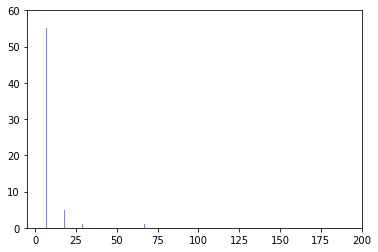

In [155]:
#basic histogram of data
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df_xml['Total_Minor'], bins='auto', facecolor='blue', alpha=.5)

plt.xlim([-5,200])
plt.ylim([0,60])

plt.show()



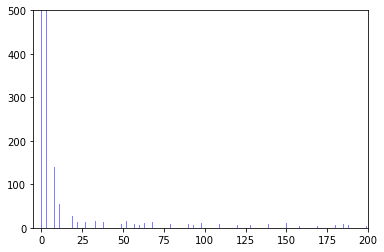

In [29]:
n, bins, patches = plt.hist(x=df_xml['Total_Uninjured'], bins='auto', facecolor='blue', alpha=.5)

plt.xlim([-5,200])
plt.ylim([0,500])

plt.show()

In [30]:
#This begins the code for reading in all the json files
#creating format to read all json files
path_to_json = '/Users/awburns2/Documents/Github/data-scientist-exercise02/data/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]


In [31]:
#create an empty df to read the json files into
data_json = pd.DataFrame(columns=['EventId', 'Narrative', 'Probable_Cause'])

In [33]:
#enumerating through json files
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        for i, info in enumerate(json_text['data']):
        
        
            #saving relevant information
                
            EventId = json_text['data'][i]['EventId']
            Narrative = json_text['data'][i]['narrative']
            Probable_Cause = json_text['data'][i]['probable_cause']
            
            count = data_json['EventId'].count()
            
            #pushing final indexes to df
            data_json.loc[count] = [EventId, Narrative, Probable_Cause]

In [113]:
#checking general structure of json file df
#data_json.head()

In [114]:
#creating final df with all merged info
df_combf = pd.merge(data_json, df_xml, how='inner', on=['EventId','EventId'])

In [115]:
#This starts code to analyze part of the text from probable cause
#only using first 300 entries to balance with size of text file
df_comb = df_combf[:200]

In [90]:
#text analysis begins here

In [91]:
#import stop words
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

#import packages to tokenize and stem words
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [116]:
#creating porter stemmer and empty list to store tokenized words
stem=PorterStemmer()

tokenized_cause=[]

In [117]:
#Run through causes, tokenize and stem, creates a list with a 
#list of words for each cause
for line in range(0,len(df_comb['Probable_Cause'])):
    tokenized_word = word_tokenize(df_comb.iloc[line,2])
    for word in range(0,len(tokenized_word)):
        tokenized_word[word] = stem.stem(tokenized_word[word])
    tokenized_cause.append(tokenized_word)

In [118]:
#Filter out all the stop words
filtered_cause=[]
for i in range(0,len(df_comb['Probable_Cause'])):
    filtered_cause_int=[]
    for j in range(0,len(tokenized_cause[i])):
        tokenized_cause[i][j]=tokenized_cause[i][j].lower()
        if tokenized_cause[i][j] not in stop_words:
            filtered_cause_int.append(tokenized_cause[i][j])
    
    filtered_cause.append(filtered_cause_int)

In [119]:
#Join filtered causes back into individual causes in a list to visualize again
causes_final_list = []

for i in filtered_cause:
    temp = " ".join(i)
    causes_final_list.append(temp)

In [120]:
#use to see new filtered and stemmed causes
#causes_final_list

In [136]:
#read packages for feature extracting
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

In [137]:
#Count raw term frequencies

count = CountVectorizer()
term_vec = count.fit_transform( causes_final_list )

n_concepts = 5

In [138]:
# Build a string list of topics

col_nm = [ ]
for i in range( 1, n_concepts + 1 ):
    col_nm += [ f'Concept {i}' ]

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

In [140]:
# Fit an LDA model to the term vectors, get cosine similarities

lda_model = LDA( n_components=n_concepts, random_state = 1 )
concept = lda_model.fit_transform( term_vec )
X = cosine_similarity( concept )

In [141]:
# Print top 10 terms for each topic

feat = count.get_feature_names()
topic_list = [ ]
for i,topic in enumerate( lda_model.components_ ):
    top_n = [ feat[ i ] for i in topic.argsort()[ -10: ] ]
    top_feat = ' '.join( top_n )
    topic_list.append( f"topic_{'_'.join(top_n[ :3 ] ) }" )

    print( f'Concept {i}: {top_feat}' )
print()

Concept 0: glider command aircraft accid land dure wa factor failur pilot
Concept 1: loss engin airplan power failur fuel factor result pilot land
Concept 2: dure result flight maintain failur engin loss power control pilot
Concept 3: accid improp crosswind dure failur factor inadequ control land pilot
Concept 4: dure runway flight land condit maintain wa factor failur pilot

